<center>

# **<font color='Purple'>BANK MARKETING</font>**

<center>

<image src="https://www.processmaker.com/wp-content/uploads/2020/04/banking-cover-1.png" alt=" ">

## **<font color='Purple'>Comprensión del negocio</font>**

Fuente de datos: [UCI Irvine ML Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing)

**Descripción general**

Los datos están relacionados con campañas de marketing directo de una entidad bancaria portuguesa. Las campañas de marketing se basaban en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente para saber si el producto (depósito bancario a plazo) se suscribía ("sí") o no ("no"). 


* Deposito bancario a plazo: Son un tipo de operación financiera que consiste en depositar dinero por un periodo de tiempo específico a la espera de una rentabilidad segura -> [BBVA](https://www.bbva.pe/blog/mis-finanzas/inversiones/que-es-un-deposito-a-plazo-fijo.html).


**Descripción de los datos**

| N° | Características | Descripción |
| --- | --- | --- |
| 1 | age | Edad del cliente (numérica) |
| 2 | job | Tipo de trabajo (categórica: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") |
| 3 | marital | Estado civil (categórica: "married","divorced","single"; nota: "divorced" significa divorciado o viudo) |
| 4 | education | Educación (categórica: "unknown","secondary","primary","tertiary") |
| 5 | default | ¿Tiene crédito en mora? (binaria: "yes","no") |
| 6 | balance | Saldo medio anual, en euros (numérica) |
| 7 | housing | ¿Tiene préstamo hipotecario? (binaria: "yes","no") |
| 8 | loan | ¿Tiene préstamo personal? (binaria: "yes","no") |
| 9 | contact | Tipo de comunicación de contacto (categórica: "unknown","telephone","cellular") |
| 10 | day | Último día de contacto del mes (numérica) |
| 11 | month | Último mes de contacto del año (categórica: "jan", "feb", "mar", ..., "nov", "dec") |
| 12 | duration | Duración del último contacto, en segundos (numérica) |
| 13 | campaign | Número de contactos realizados durante esta campaña y para este cliente (numérica, incluye el último contacto) |
| 14 | pdays | Número de días que han pasado desde que el cliente fue contactado por última vez desde una campaña anterior (numérica, -1 significa que el cliente no fue contactado previamente) |
| 15 | previous | Número de contactos realizados antes de esta campaña y para este cliente (numérica) |
| 16 | poutcome | Resultado de la campaña de marketing anterior (categórica: "unknown","other","failure","success") |
| 17 | y | ¿Ha suscrito el cliente un depósito a plazo? (binaria: "yes","no") |


**Objetivo:**

* Predecir si el cliente se suscribirá a un depósito a plazo (y).

**Tasks:**

* ¿Qué tipo de contacto es más efectivo para lograr la suscripción de un depósito a plazo? (barras o caja o violin) tipo_contacto vs target
* ¿Cuántos contactos se necesitan para lograr la suscripción de un depósito a plazo? (nro_contactos vs target)
* ¿De los cliente cual es el rango de edad que más tiende a realizar la suscripción? (edad vs target)
* ¿Qué impacto tiene el saldo medio anual de los clientes en la suscripción de un depósito a plazo? (saldo_vedio vs target)
* ¿Qué características de los clientes influyen más en la suscripción de un depósito a plazo? (usar matriz de correlación)

### **<font color='Purple'>Flujo de trabajo</font>**

<center>

![image.png](data/workflow.png)

## **<font color='Purple'>Importar librerías</font>**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## **<font color='Purple'>Lectura de los datos</font>**

In [2]:
df = pd.read_csv("./data/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


* Vision general de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* El dataset cuenta con 45211 registros (clientes)

In [4]:
df.describe(percentiles=[0.10, .25, .50, .75, .90]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
age,45211.0,40.936210,10.618762,18.0,29.0,33.0,39.0,48.0,56.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,0.0,72.0,448.0,1428.0,3574.0,102127.0
day,45211.0,15.806419,8.322476,1.0,5.0,8.0,16.0,21.0,28.0,31.0
duration,45211.0,258.163080,257.527812,0.0,58.0,103.0,180.0,319.0,548.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,1.0,2.0,3.0,5.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,-1.0,185.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,0.0,2.0,275.0


* Se observa que la edad mínima es 18 y la maxima de 95, sin embargo, el mayor rango se encuentra entre el percentil 90 y el max valor, el cual es un indicador de presencia de outliers.
* el saldo medio anual es de -8019, esto posiblemente se deba a un cliente moroso, entre otros, hay presencia de clientes con un saldo muy alto de 102127 euros(gana bien o ahorra bastante), sin embargo en ambos extremos los rangos son grandes, por lo que indica presencia de outliers.
* 

In [5]:
df.describe(include=object).T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [7]:
# Cambiando los nombre de las columnas
df.rename({'age':'edad', 'job':'tipo_trabajo', 'marital':'estado_civil', 
           'education':'nivel_educativo', 'default':'credito_mora', 
           'balance':'saldo_anual', 'housing':'prestamo_hipotecario',
           'loan':'prestamo_personal', 'contact':'medio_comunicacion', 
           'day':'ultimo_dia_contacto', 'month':'ultimo_mes_contacto', 
           'duration':'duracion_llamada', 'campaign':'nro_contactos_campania', 
           'pdays':'dias_transc_campania_anterior', 'previous':'nro_contactos_previos', 
           'poutcome':'result_ultima_campania', 'y':'target'}, axis=1, inplace=True)
df.head()

,edad,tipo_trabajo,estado_civil,nivel_educativo,credito_mora,saldo_anual,prestamo_hipotecario,prestamo_personal,medio_comunicacion,ultimo_dia_contacto,ultimo_mes_contacto,duracion_llamada,nro_contactos_campania,dias_transc_campania_anterior,nro_contactos_previos,result_ultima_campania,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## **<font color='Purple'>Análisis exploratorio de los datos (EDA)</font>**

obtener el nombre de las columnas categoricas

In [206]:
columnas_categoricas = df.select_dtypes(include='object').columns 
columnas_categoricas

Index(['tipo_trabajo', 'estado_civil', 'nivel_educativo', 'credito_mora',
       'prestamo_hipotecario', 'prestamo_personal', 'medio_comunicacion',
       'ultimo_mes_contacto', 'result_ultima_campania', 'target'],
      dtype='object')

In [207]:
columnas_numericas = df.select_dtypes(include='number').columns
columnas_numericas

Index(['edad', 'saldo_anual', 'ultimo_dia_contacto', 'duracion_llamada',
       'nro_contactos_campania', 'dias_transc_campania_anterior',
       'nro_contactos_previos'],
      dtype='object')

### **<font color='Purple'>Distribución de los datos</font>**

ANALISIS UNIVARIADO

OBSERVAR LA VARIABILIDAD DE LOS DATOS

In [208]:
for col in columnas_categoricas:
    print(f'{col}:  {df[col].unique()} \n')


tipo_trabajo:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

estado_civil:  ['married' 'single' 'divorced'] 

nivel_educativo:  ['tertiary' 'secondary' 'unknown' 'primary'] 

credito_mora:  ['no' 'yes'] 

prestamo_hipotecario:  ['yes' 'no'] 

prestamo_personal:  ['no' 'yes'] 

medio_comunicacion:  ['unknown' 'cellular' 'telephone'] 

ultimo_mes_contacto:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

result_ultima_campania:  ['unknown' 'failure' 'other' 'success'] 

target:  ['no' 'yes'] 



DIAGRAMA DE BARRAS

In [ ]:
# Esta línea crea una gráfica de barras para cada columna categórica usando la librería Seaborn
num_rows = (len(columnas_categoricas) + 2) // 3 # Esta línea calcula el número de filas que se necesitan para mostrar las gráficas, usando la división entera 
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows)) # Esta línea crea una figura y un arreglo de ejes con el número de filas y columnas especificados, y un tamaño de figura proporcional

for i, column in enumerate(columnas_categoricas): # Esta línea inicia un bucle for que recorre cada columna categórica y le asigna un índice i 
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values, ax=axs[i//3, i%3]) # Esta línea crea una gráfica de barras usando los valores y las frecuencias de cada columna, y la ubica en el eje correspondiente según el índice i 
    axs[i//3, i%3].set_xlabel(column) # Esta línea asigna el nombre de la columna como etiqueta del eje x 
    axs[i//3, i%3].set_ylabel('Count') # Esta línea asigna el texto ‘Count’ como etiqueta del eje y 
    axs[i//3, i%3].tick_params(axis='x', rotation=90) # Esta línea rota los valores del eje x 45 grados para mejorar la visualización

plt.show() # Esta línea muestra la figura con todas las gráficas de barras

```python
# Create a bar plot for each categorical column using Seaborn
num_rows = (len(columnas_categoricas) + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

for i, column in enumerate(columnas_categoricas):
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values, ax=axs[i//3, i%3])
    axs[i//3, i%3].set_xlabel(column)
    axs[i//3, i%3].set_ylabel('Count')
    axs[i//3, i%3].tick_params(axis='x', rotation=45)

plt.show()

```

HISTOGAMA

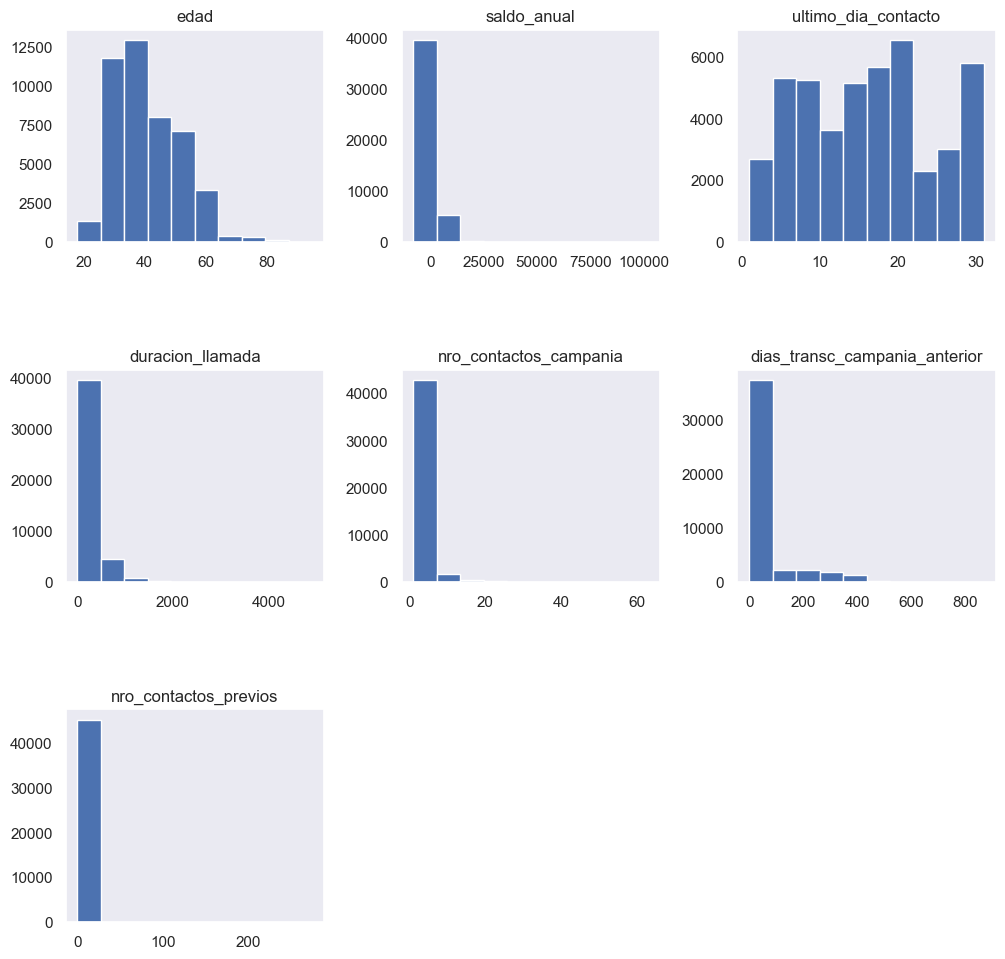

In [ ]:
# plot histograms for all numeric columns
df[columnas_numericas].hist(bins=10, figsize=(12,16), grid=False,layout=(len(columnas_categoricas)//3+1, 3))
# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.6)

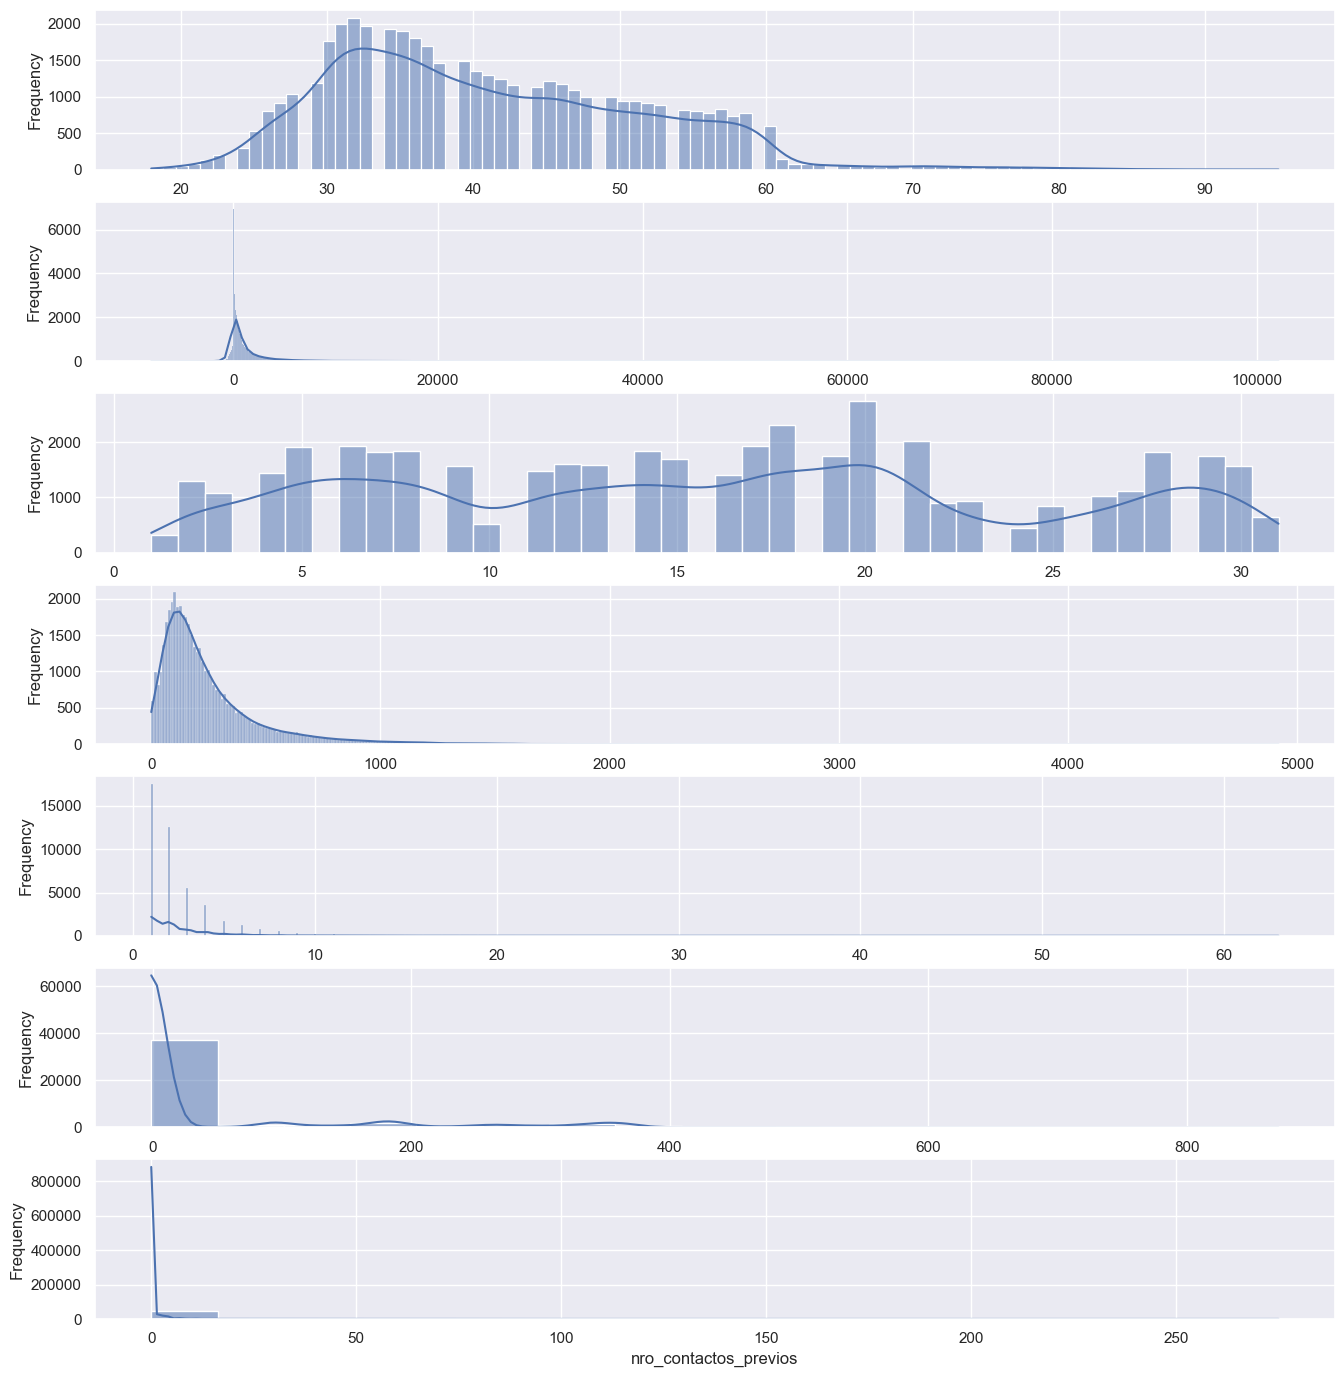

In [ ]:
# Plot histograms for numerical columns using Seaborn
fig, axs = plt.subplots(nrows=len(columnas_numericas), ncols=1, figsize=(16,17))

for i, column in enumerate(columnas_numericas):
    sns.histplot(data=df, x=column, kde=True, ax=axs[i])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.show()


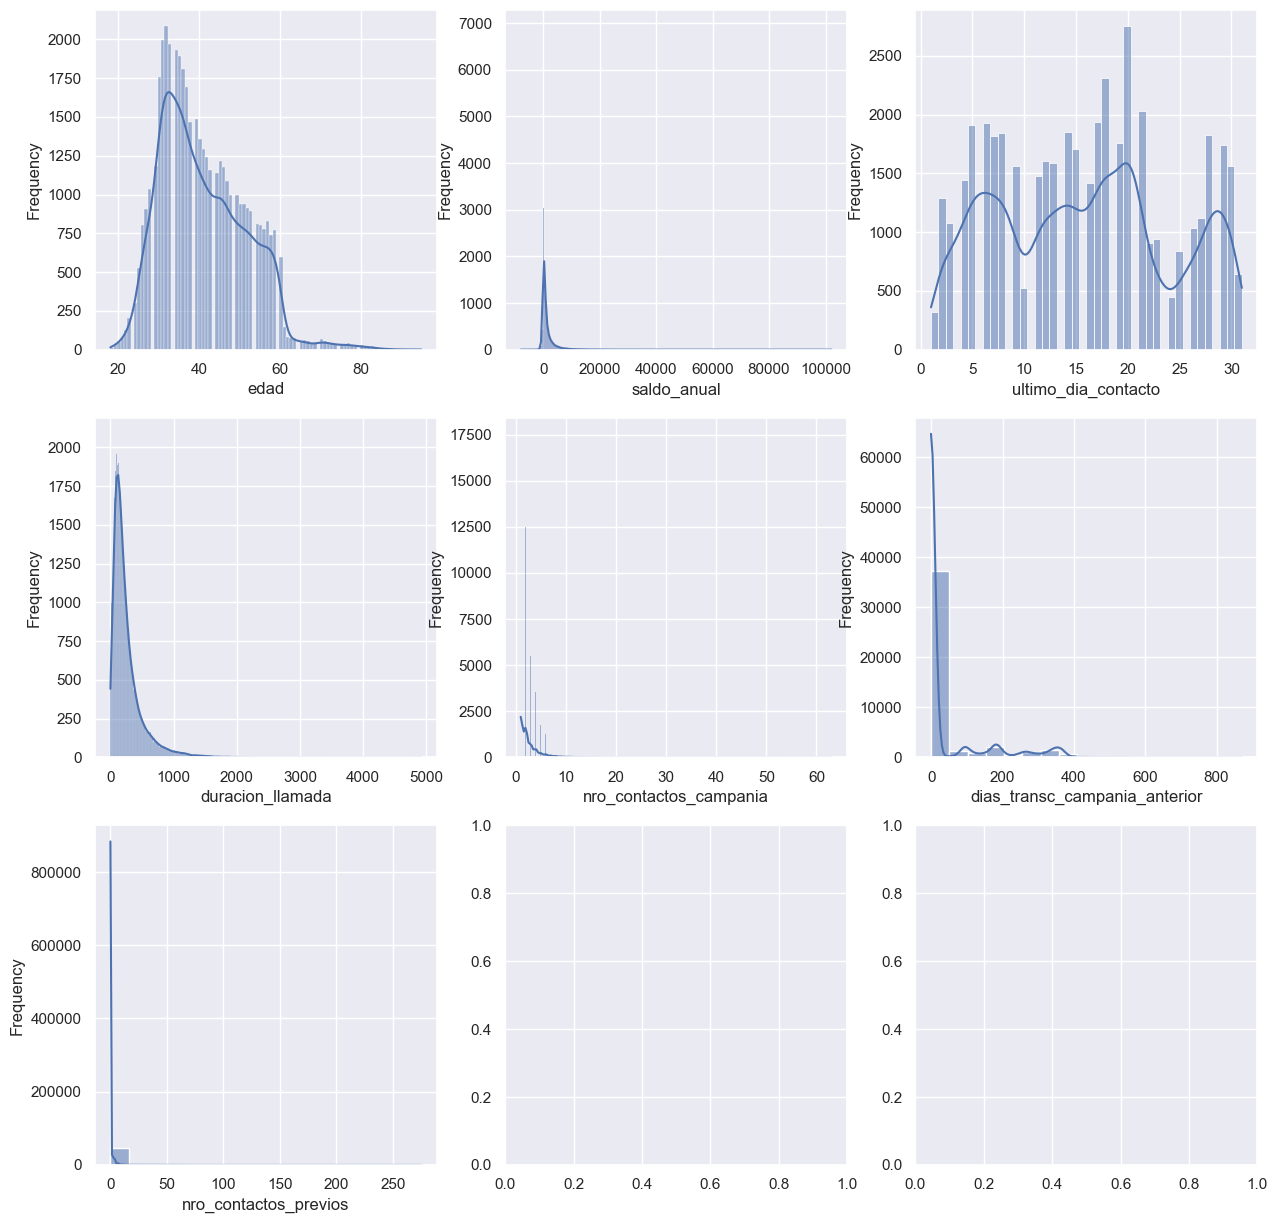

In [ ]:
# Plot histograms for numerical columns using Seaborn
num_rows = (len(columnas_numericas) + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

for i, column in enumerate(columnas_numericas):
    sns.histplot(data=df, x=column, kde=True, ax=axs[i//3, i%3])
    axs[i//3, i%3].set_xlabel(column)
    axs[i//3, i%3].set_ylabel('Frequency')

plt.show()

ANALISIS BIVARIADO

¿Campaña anterior?

<Axes: xlabel='target'>

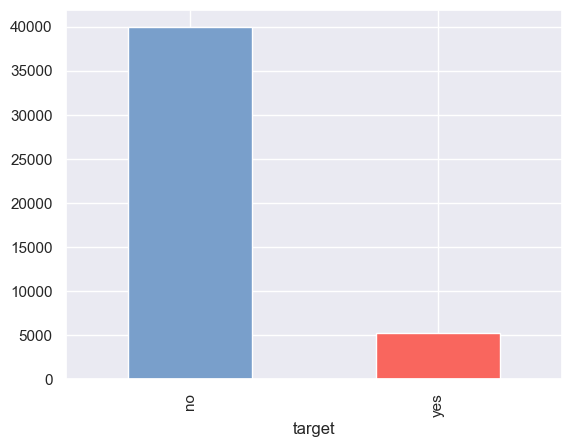

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["#799fcb","#f9665e"])

* Datos desbalanceados

<Axes: xlabel='result_ultima_campania'>

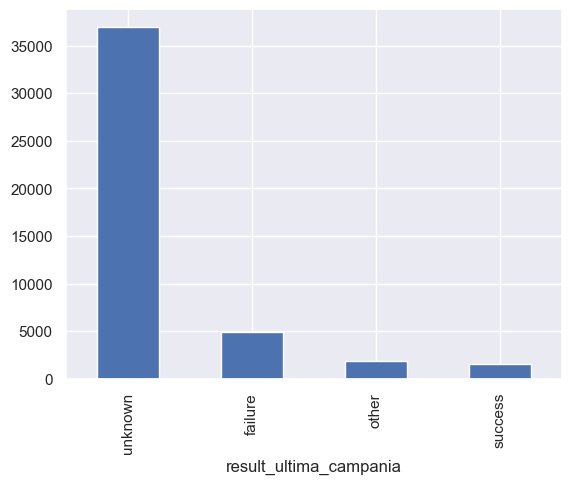

In [ ]:
df['result_ultima_campania'].value_counts().plot(kind='bar')

* Columna que por el momento no lo tomaremos en cuenta, hay que conocer e interactuar con la empresa para averiguar a que se debe dichas categorias

### * ¿Qué tipo de contacto es más efectivo para lograr la suscripción de un depósito a plazo? (barras o caja o violin) tipo_contacto vs target

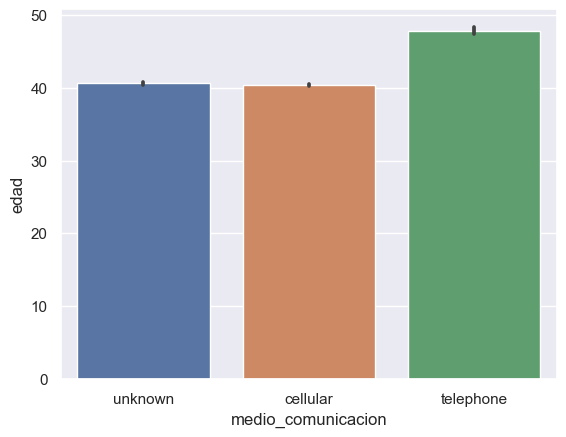

In [ ]:
# Create a bar plot using Seaborn
sns.barplot(x='medio_comunicacion', y='edad', data=df)
plt.show()

In [ ]:
#df.groupby()

### * ¿Cuántos contactos se necesitan para lograr la suscripción de un depósito a plazo? (nro_contactos vs target)

### * ¿De los cliente cual es el rango de edad que más tiende a realizar la suscripción? (edad vs target)

### * ¿Qué impacto tiene el saldo medio anual de los clientes en la suscripción de un depósito a plazo? (saldo_vedio vs target)


### * ¿Qué características de los clientes influyen más en la suscripción de un depósito a plazo? (usar matriz de correlación)

In [ ]:
# plt.figure(figsize=(18, 12))
# corr = df.corr().round(2)
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# heatmap = sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, mask=mask)
# heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12)

## **<font color='Purple'>Preprocesamiento de los datos</font>**

### **<font color='Purple'>Búsqueda de datos faltante</font>**

In [ ]:
df.isna().sum()

edad                             0
tipo_trabajo                     0
estado_civil                     0
nivel_educativo                  0
credito_mora                     0
saldo_anual                      0
prestamo_hipotecario             0
prestamo_personal                0
medio_comunicacion               0
ultimo_dia_contacto              0
ultimo_mes_contacto              0
duracion_llamada                 0
nro_contactos_campania           0
dias_transc_campania_anterior    0
nro_contactos_previos            0
result_ultima_campania           0
target                           0
dtype: int64

### **<font color='#7d2181'>Datos duplicados</font>**

In [ ]:
df.duplicated().sum()

0

### **<font color='#7d2181'>Búsqueda y tratamiento de outliers</font>**

<Axes: >

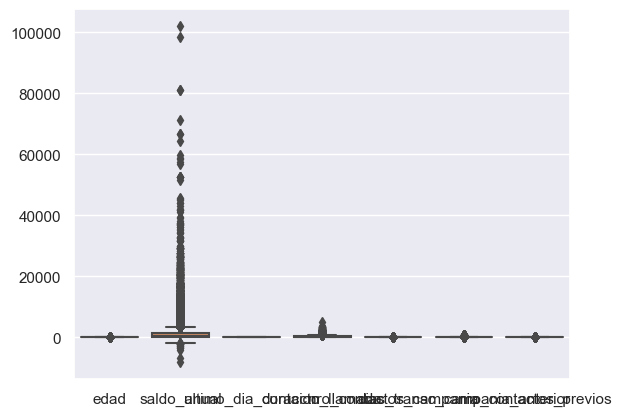

In [ ]:
sns.boxplot(df)

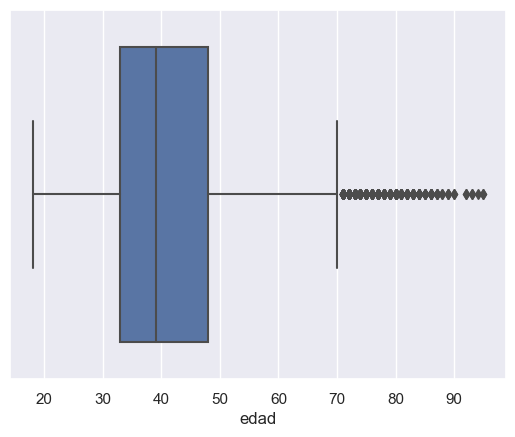

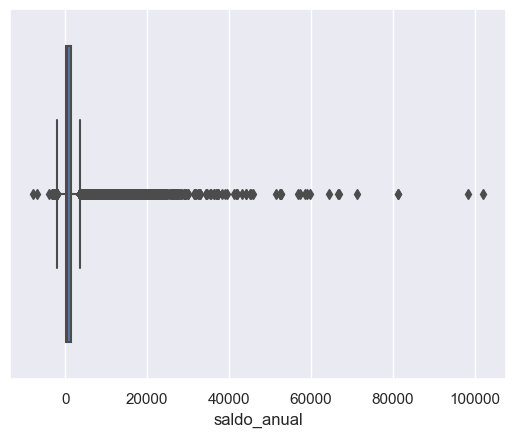

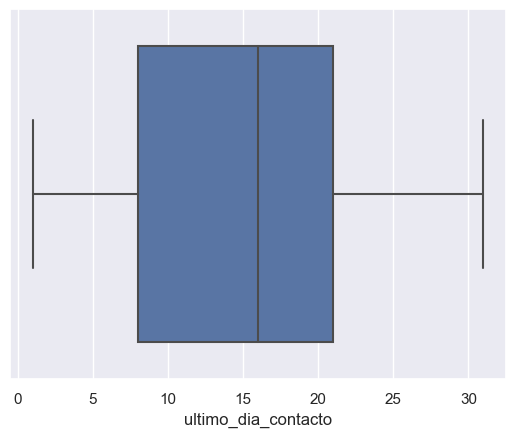

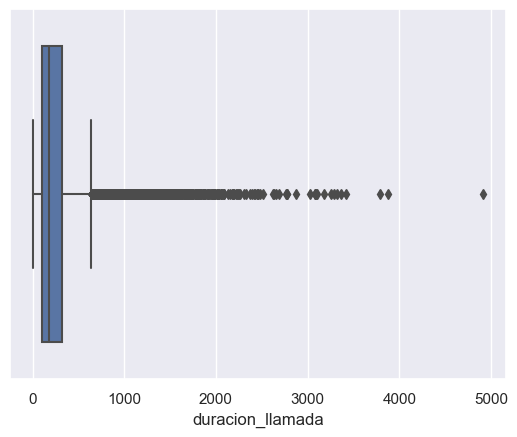

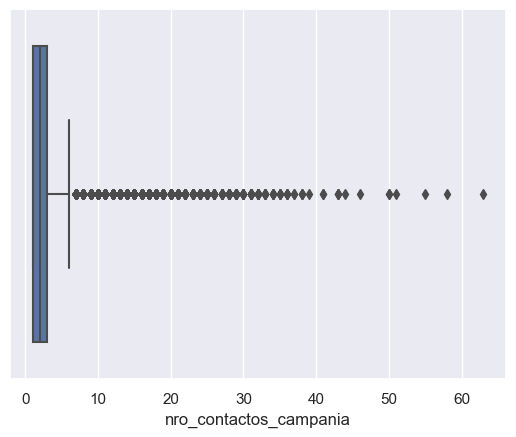

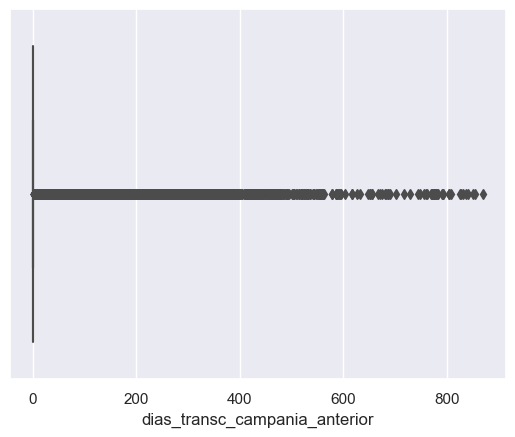

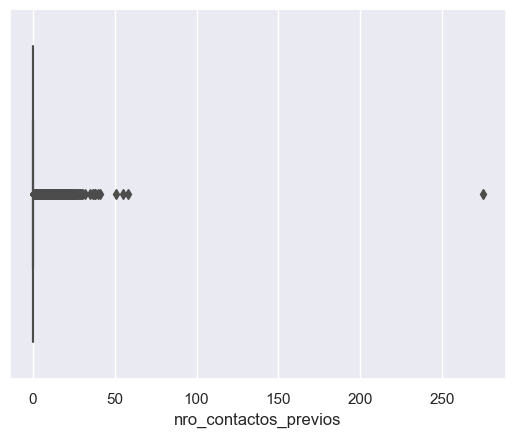

In [ ]:
for col in columnas_numericas:
    sns.boxplot(x=df[col])
    plt.show()

TRATAMIENTO DE DATOS OUTLIERS MEDIANTE LA TECNICA IQR

In [ ]:
def replace_outliers_with_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].mask(df[col] < lower_bound, lower_bound)
    df[col] = df[col].mask(df[col] > upper_bound, upper_bound)
    return df

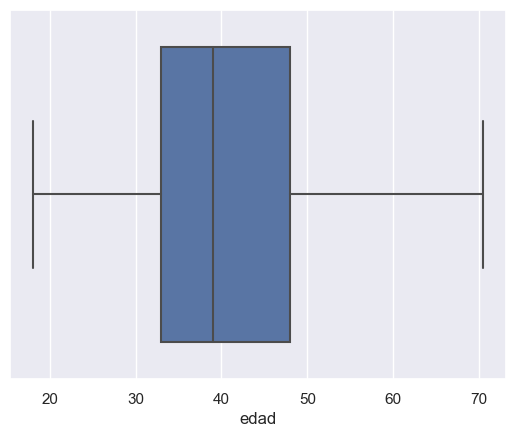

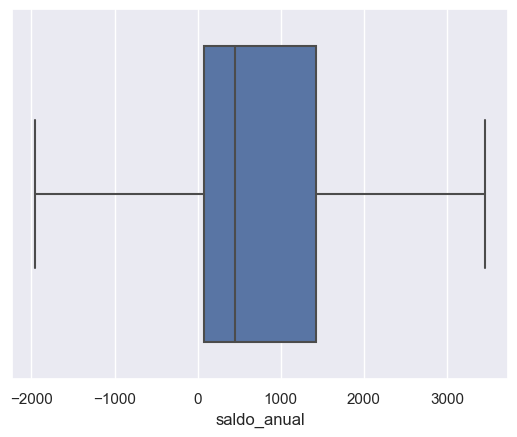

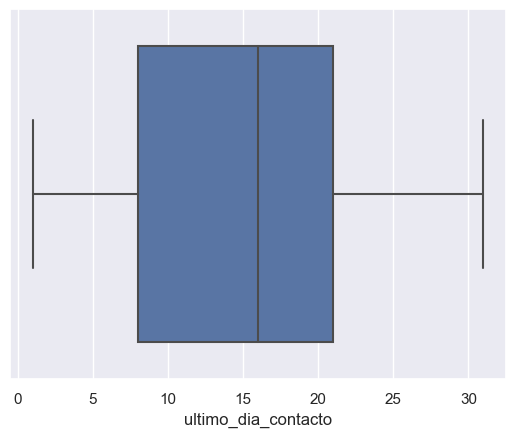

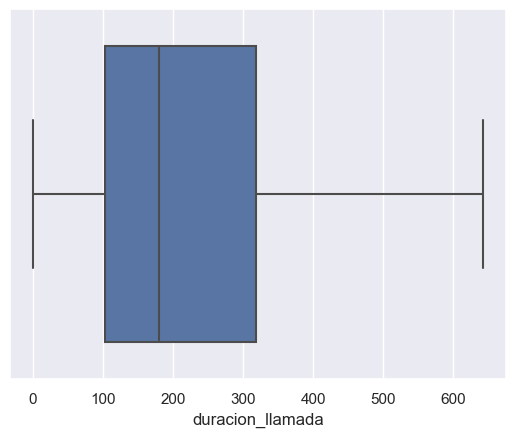

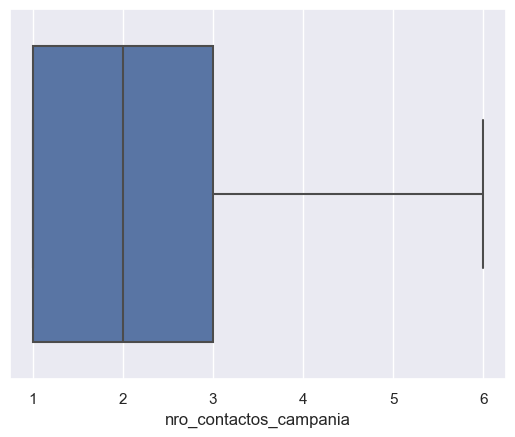

In [ ]:
df_copy = df.copy(deep=True) 
#list(columnas_numericas).remove 'nro_contactos_previos'


df2 = replace_outliers_with_iqr(df_copy, 'edad')
for col in columnas_numericas[:-2]: # columnas_numericas[:-2]
    df2 = replace_outliers_with_iqr(df2, col)
    sns.boxplot(x=df2[col])
    plt.show()

In [ ]:
df2['dias_transc_campania_anterior'].value_counts()

dias_transc_campania_anterior
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

In [ ]:
df2['nro_contactos_previos'].value_counts()

nro_contactos_previos
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64

### **<font color='#7d2181'>Transformación de datos categóricos a numéricos</font>**

También conocidos como artefactos

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.head()

,edad,tipo_trabajo,estado_civil,nivel_educativo,credito_mora,saldo_anual,prestamo_hipotecario,prestamo_personal,medio_comunicacion,ultimo_dia_contacto,ultimo_mes_contacto,duracion_llamada,nro_contactos_campania,dias_transc_campania_anterior,nro_contactos_previos,result_ultima_campania,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df2['nivel_educativo'].value_counts()

nivel_educativo
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

### Label encoding

In [ ]:
label_encoder = LabelEncoder()
categorias = ['primary','secondary','unknown','tertiary']
label_encoder.fit(categorias)
# Apply LabelEncoder to multiple columns
df2['nivel_educativo'] = label_encoder.transform(df2['nivel_educativo'])

In [ ]:
df2['nivel_educativo']

0        2
1        1
2        1
3        3
4        3
        ..
45206    2
45207    0
45208    1
45209    1
45210    1
Name: nivel_educativo, Length: 45211, dtype: int32

CAMBIAR DE TEXTO A NUMERO LA COLUMNA ULTIMO MES DE CONTACTO

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to the "ultimo_mes_contacto" column
df['ultimo_mes_contacto'] = df['ultimo_mes_contacto'].astype('category')
# Define the order of the months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# Create a LabelEncoder object
label_encoder = LabelEncoder()
df['ultimo_mes_contacto'] = df['ultimo_mes_contacto'].cat.set_categories(month_order)
df['ultimo_mes_contacto'] = label_encoder.fit_transform(df['ultimo_mes_contacto'])

In [ ]:
df['ultimo_mes_contacto']

0        8
1        8
2        8
3        8
4        8
        ..
45206    9
45207    9
45208    9
45209    9
45210    9
Name: ultimo_mes_contacto, Length: 45211, dtype: int32

### Onehot Encoding

In [ ]:
columnas_categoricas.values

array(['tipo_trabajo', 'estado_civil', 'nivel_educativo', 'credito_mora',
       'prestamo_hipotecario', 'prestamo_personal', 'medio_comunicacion',
       'ultimo_mes_contacto', 'result_ultima_campania', 'target'],
      dtype=object)

In [ ]:
columnas_categoricas2 = [x for x in columnas_categoricas.values if x not in ['nivel_educativo', 'target']]

ohe = OneHotEncoder(sparse_output=False, drop='first')
ohe.fit(df2[columnas_categoricas2])
encoded = ohe.transform(df2[columnas_categoricas2])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())
df3 = pd.concat([df2,encoded_df],axis=1).copy()
df3.drop(columnas_categoricas2, axis=1, inplace=True)
df3.head()


,edad,nivel_educativo,saldo_anual,ultimo_dia_contacto,duracion_llamada,nro_contactos_campania,dias_transc_campania_anterior,nro_contactos_previos,target,tipo_trabajo_blue-collar,...,ultimo_mes_contacto_jul,ultimo_mes_contacto_jun,ultimo_mes_contacto_mar,ultimo_mes_contacto_may,ultimo_mes_contacto_nov,ultimo_mes_contacto_oct,ultimo_mes_contacto_sep,result_ultima_campania_other,result_ultima_campania_success,result_ultima_campania_unknown
0,58.0,2,2143,5,261,1,-1,0,no,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44.0,1,29,5,151,1,-1,0,no,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33.0,1,2,5,76,1,-1,0,no,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47.0,3,1506,5,92,1,-1,0,no,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33.0,3,1,5,198,1,-1,0,no,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df3['target']=df3['target'].replace('yes', 1).replace('no', 0)
df3['target']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target, Length: 45211, dtype: int64

# CORRELACION

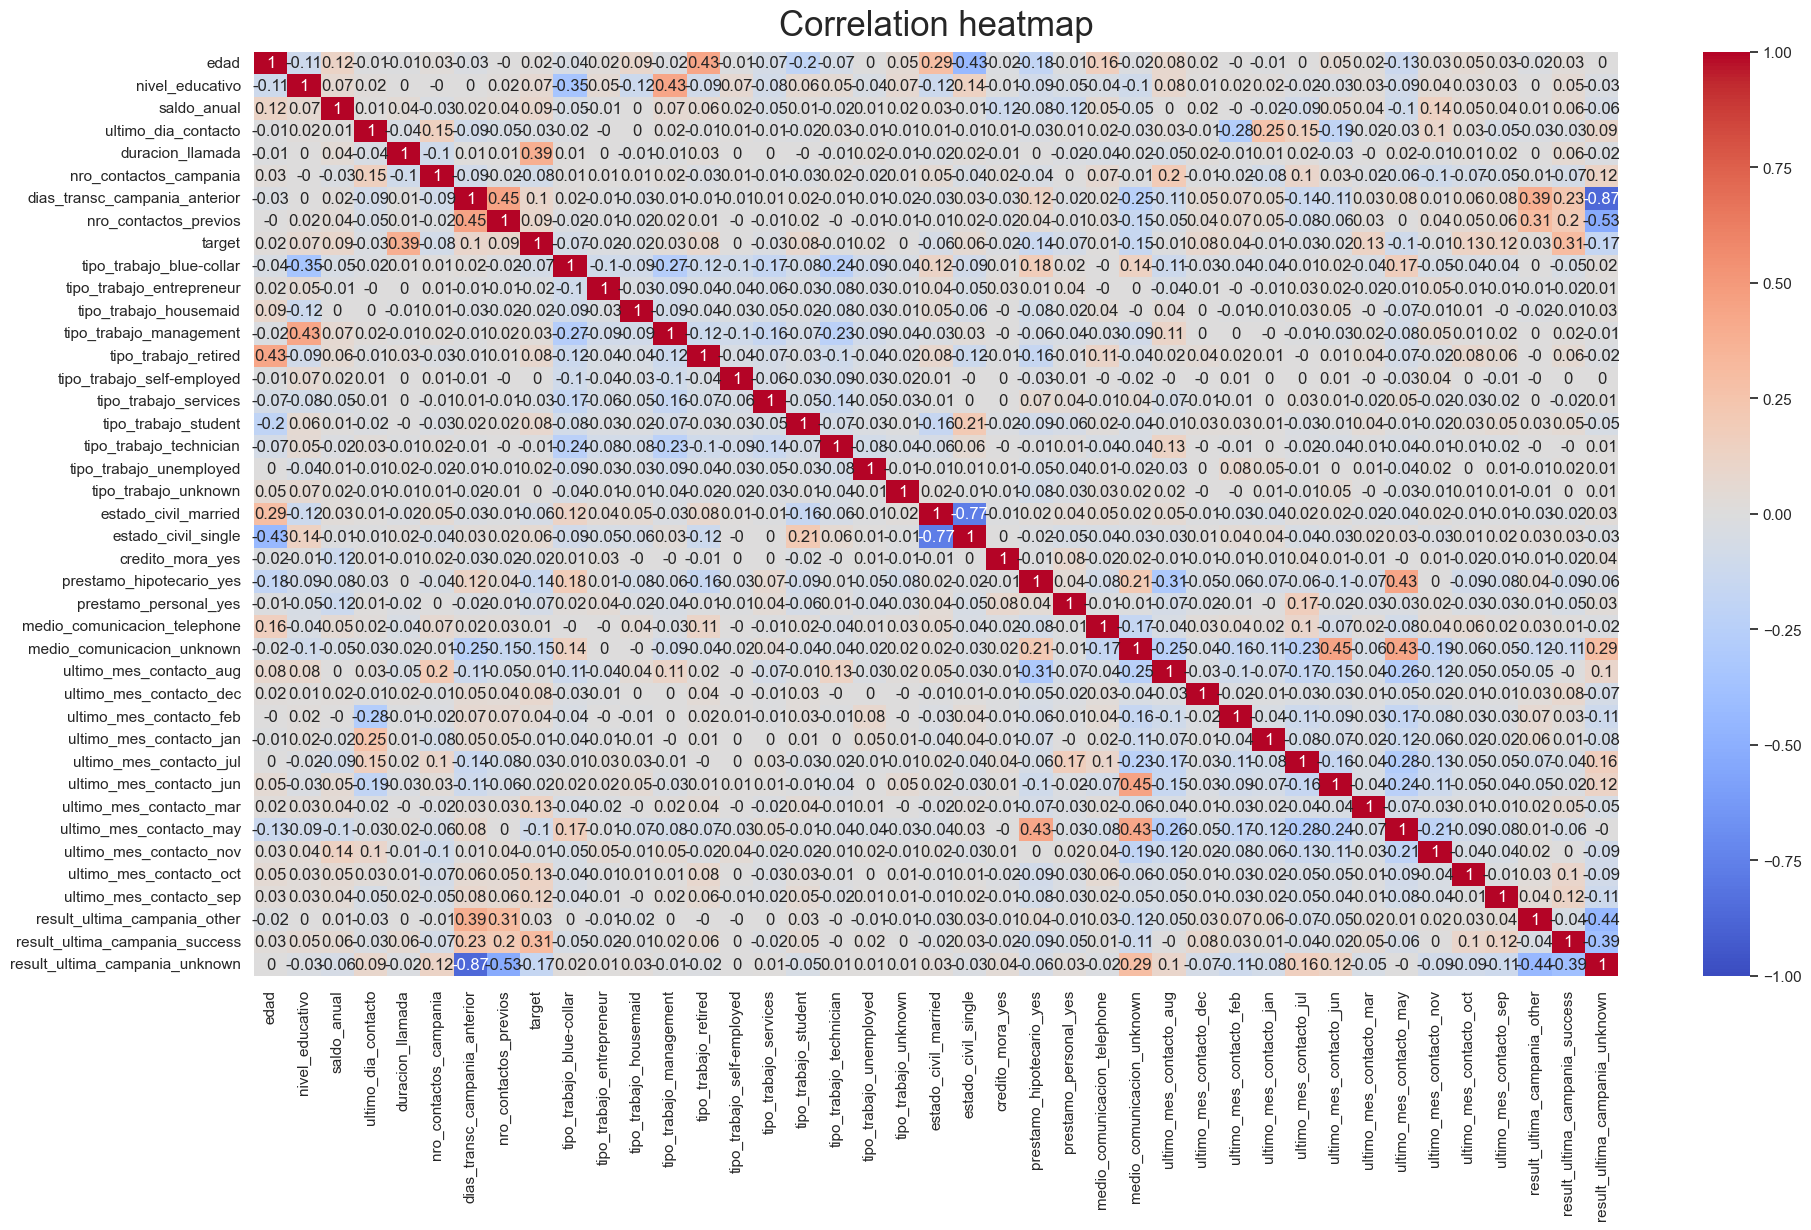

In [ ]:
plt.figure(figsize=(22, 12))
corr = df3.corr().round(2)
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True)#, mask=mask)
heatmap.set_title('Correlation heatmap', fontdict={'fontsize':25}, pad=12)
plt.show()

In [ ]:
corr = df3.corr().round(3)
abs(corr['target']).sort_values(ascending=False)

target                            1.000
duracion_llamada                  0.391
result_ultima_campania_success    0.307
result_ultima_campania_unknown    0.167
medio_comunicacion_unknown        0.151
prestamo_hipotecario_yes          0.139
ultimo_mes_contacto_mar           0.129
ultimo_mes_contacto_oct           0.129
ultimo_mes_contacto_sep           0.123
dias_transc_campania_anterior     0.104
ultimo_mes_contacto_may           0.102
nro_contactos_previos             0.093
saldo_anual                       0.093
nro_contactos_campania            0.084
tipo_trabajo_retired              0.079
tipo_trabajo_student              0.077
ultimo_mes_contacto_dec           0.075
tipo_trabajo_blue-collar          0.072
prestamo_personal_yes             0.068
nivel_educativo                   0.066
estado_civil_single               0.064
estado_civil_married              0.060
ultimo_mes_contacto_feb           0.038
ultimo_mes_contacto_jul           0.034
tipo_trabajo_management           0.033


In [ ]:
abs(corr['target']).sort_values(ascending=False).index[1:11]#[1:21]

Index(['duracion_llamada', 'result_ultima_campania_success',
       'result_ultima_campania_unknown', 'medio_comunicacion_unknown',
       'prestamo_hipotecario_yes', 'ultimo_mes_contacto_mar',
       'ultimo_mes_contacto_oct', 'ultimo_mes_contacto_sep',
       'dias_transc_campania_anterior', 'ultimo_mes_contacto_may'],
      dtype='object')

### **<font color='#7d2181'>Escalamiento de los datos</font>**

VARIABLE DEPENDIENTE E INDEPENDIENTE

In [ ]:
X = df3.drop(['target'],axis=1)
y = df3['target']

In [ ]:
X = df3.drop(['target'],axis=1)
X = X[['duracion_llamada', 'result_ultima_campania_success',
       'result_ultima_campania_unknown', 'medio_comunicacion_unknown',
       'prestamo_hipotecario_yes', 'ultimo_mes_contacto_mar',
       'ultimo_mes_contacto_oct', 'ultimo_mes_contacto_sep',
       'dias_transc_campania_anterior', 'ultimo_mes_contacto_may']]

y = df3['target']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
X.shape

(45211, 10)

### **<font color='Purple'>Aplicación de pipelines en el preprocesamiento de datos</font>**

In [ ]:
df_copy_2 =  X.copy(deep=True) #df.copy(deep=True)
for col in columnas_numericas[:-2]: # columnas_numericas[:-2]
    df_copy_2 = replace_outliers_with_iqr(df2, col)

X = df_copy_2.drop(['target'], axis=1)
df_copy_2['target'] = df_copy_2['target'].replace('yes', 1).replace('no', 0)
y = df_copy_2['target']
X


,edad,tipo_trabajo,estado_civil,nivel_educativo,credito_mora,saldo_anual,prestamo_hipotecario,prestamo_personal,medio_comunicacion,ultimo_dia_contacto,ultimo_mes_contacto,duracion_llamada,nro_contactos_campania,dias_transc_campania_anterior,nro_contactos_previos,result_ultima_campania
0,58.0,management,married,2,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44.0,technician,single,1,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33.0,entrepreneur,married,1,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47.0,blue-collar,married,3,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33.0,unknown,single,3,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,2,no,825,no,no,cellular,17,nov,643,3,-1,0,unknown
45207,70.5,retired,divorced,0,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,70.5,retired,married,1,no,3462,no,no,cellular,17,nov,643,5,184,3,success
45209,57.0,blue-collar,married,1,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [ ]:
from sklearn import set_config
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

col_numericas = X_.select_dtypes(include='number').columns
col_categoricas_1 = ['nivel_educativo']
col_categoricas_2 = X_.select_dtypes(include='object').columns.difference(col_categoricas_1).tolist()

columnas_numericas_p = make_pipeline(
    SimpleImputer(),
    StandardScaler()
)

columnas_categoricas_1 = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)

columnas_categoricas_2 = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=True, handle_unknown='ignore', drop='first')
)

pipe = make_column_transformer(
    (columnas_numericas_p, col_numericas),
    (columnas_categoricas_1, col_categoricas_1),
    (columnas_categoricas_2, col_categoricas_2)
)

set_config(display='diagram')
pipe # muestra el diagrama del pipeline


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['edad', 'nivel_educativo', 'saldo_anual', 'ultimo_dia_contacto',
       'duracion_llamada', 'nro_contactos_campania',
       'dias_transc_campania_anterior', 'nro_contactos_previos'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[...
                                                                 unknown_value=-1))]),
                                 ['nivel_educativo']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['credito_mora', 'estado_civil',
                                  'medio_comunicacion', 'prestamo_hipotecario',
                                  'prestamo_personal', 'result_ultima_campania',
                                  'tipo_trabajo', 'ultimo_mes_contacto'])])

In [ ]:
# aplicar pipeline

X2 = pipe.fit_transform(X) # dataframe transformado con los pipelines
X2

array([[ 1.64811715,  1.03636182,  1.02765295, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30128731, -0.30055587, -0.7688168 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.75693615, -0.30055587, -0.7917613 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 2.8506438 , -0.30055587,  2.1485345 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.55191502, -0.30055587, -0.22579685, ...,  1.        ,
         0.        ,  0.        ],
       [-0.37212762, -0.30055587,  1.73128443, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
import pickle

# escribir  un archivo binario en modo escritura
with open("pipe.pkl", "wb") as f:
    # Escribe el pipeline en el archivo
    pickle.dump(pipe, f)

In [ ]:
# Abre el archivo binario en modo lectura
with open("pipe.pkl", "rb") as f:
    # Carga el pipeline desde el archivo
    pipe_preprocesamiento = pickle.load(f)

In [ ]:
df_transformado2 = pipe_preprocesamiento.fit_transform(X) # dataframe transformado con los pipelines
df_transformado2

array([[ 1.64811715,  1.03636182,  1.02765295, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30128731, -0.30055587, -0.7688168 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.75693615, -0.30055587, -0.7917613 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 2.8506438 , -0.30055587,  2.1485345 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.55191502, -0.30055587, -0.22579685, ...,  1.        ,
         0.        ,  0.        ],
       [-0.37212762, -0.30055587,  1.73128443, ...,  1.        ,
         0.        ,  0.        ]])

### **<font color='#7d2181'>Dividir los datos en entrenamiento y prueba</font>**

In [ ]:
from sklearn.model_selection import train_test_split
# train:70%,  val:20%,  test:10%
# ENTRENAMIENTO Y PRUEBA
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, random_state=42, shuffle=True)
# ENTRENAMIENTO Y VALIDACION
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.20, random_state=42, shuffle=True)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((32551, 10), (8138, 10), (4522, 10))

In [ ]:
y_train.value_counts()

target
0    33952
1     4477
Name: count, dtype: int64

SMOTE

In [ ]:
# # Importa el módulo imblearn.over_sampling
# from imblearn.over_sampling import SMOTE

# # Crea una instancia de la clase SMOTE
# smote = SMOTE (random_state=42)

# # Aplica el método fit_resample a X_train y y_train
# X_res, y_res = smote.fit_resample (X_train, y_train)

In [ ]:
# Importa el módulo imblearn.over_sampling
from imblearn.over_sampling import SMOTE

# Crea una instancia de la clase SMOTE con los parámetros que quieras
smote = SMOTE(sampling_strategy=0.3, random_state=42,k_neighbors=3) # , 'minority/auto', ,, k_neighbors=3,n_jobs=-1

# Aplica el método fit_resample a X_train y y_train
X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
y_train.value_counts()

target
0    33952
1    10185
Name: count, dtype: int64

In [ ]:
X_train.shape

(44137, 10)

Este código crea una instancia de la clase SMOTE que sobremuestrea solo la clase minoritaria, usa una semilla de 42 para el generador de números aleatorios, usa 10 vecinos más cercanos para generar las instancias sintéticas y usa todos los subprocesos disponibles para ejecutar el algoritmo en paralelo. Luego, aplica el método fit_resample a los conjuntos de entrenamiento X_train y y_train y devuelve los conjuntos de entrenamiento sobremuestreados X_res y y_res.

## **<font color='Purple'>Modelado</font>**

### Seleccion de algoritmos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier



# Crear y entrenar el modelo de random forest con los parámetros por defecto
lr_model = LogisticRegression()
gnb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=3)
dt_model = DecisionTreeClassifier(max_depth=50, random_state=42)
rf_model = RandomForestClassifier(max_depth=100, random_state=42)
svm_model = SVC()
xgb_model = XGBClassifier()

# lr_model = LogisticRegression(solver='liblinear', multi_class='multinomial', max_iter=1000)
# gnb_model = GaussianNB()
# knn_model = KNeighborsClassifier(n_neighbors=3)
# dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
# rf_model = RandomForestClassifier(max_depth=5, random_state=42)
# svm_model = SVC(kernel='rbf', degree=3, gamma=0.1, C=1.0)

models = {
    'REGRESION LOGISTICA': lr_model,
    'NAIVE BAYES': gnb_model,
    'KNN': knn_model,
    'ARBOLES DE DECISION': dt_model,
    'BOSQUES ALEATORIOS': rf_model,
    #'SVM': svm_model,
    'XGB': xgb_model
}


ENTRENAMIENTO

In [ ]:
modelos_entrenados = {}
for nombre, modelo in models.items():
    # fit the models
    print(f'>>> {nombre} entrenando ...')
    modelo.fit(X_train, y_train)
    #modelo.fit(X_res, y_res)
    # save the model
    modelos_entrenados[nombre] = modelo
    print('entrenado! \n')


>>> REGRESION LOGISTICA entrenando ...
entrenado! 

>>> NAIVE BAYES entrenando ...
entrenado! 

>>> KNN entrenando ...
entrenado! 

>>> ARBOLES DE DECISION entrenando ...
entrenado! 

>>> BOSQUES ALEATORIOS entrenando ...
entrenado! 

>>> XGB entrenando ...
entrenado! 



## **<font color='Purple'>Evaluación</font>**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, precision_score, accuracy_score, recall_score

def graficar_matriz_confusion(modelos, x, y_true):
    for nombre, modelo in modelos.items():
        #print(f'{nombre}')
        # predecir
        y_pred = modelo.predict(x)
        # obtener la matriz de confusion
        cm = confusion_matrix(y_true, y_pred)
        
        # Crear una figura con matplotlib
        plt.figure(figsize=(6, 4))
        # Mostrar la matriz de confusión con seaborn
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Etiqueta predicha')
        plt.ylabel('Etiqueta verdadera')
        plt.title(f'Matriz de confusión del modelo {nombre}', size=18)
        plt.show()

        # save the model
        #modelos_entrenados[nombre] = modelo
        #print(f'{nombre} entrenado!')



def reporte_modelos(modelos, x, y_true):
    resultados = {}
    for nombre, modelo in modelos.items():
        print(f'{nombre}')
        y_pred = modelo.predict(x)

        # evaluar modelos
        precision = precision_score(y_true, y_pred)
        accuracy = accuracy_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        # guardar resultados
        resultados[nombre] = [precision, accuracy, recall]

        print(classification_report(y_true, y_pred))
    return resultados


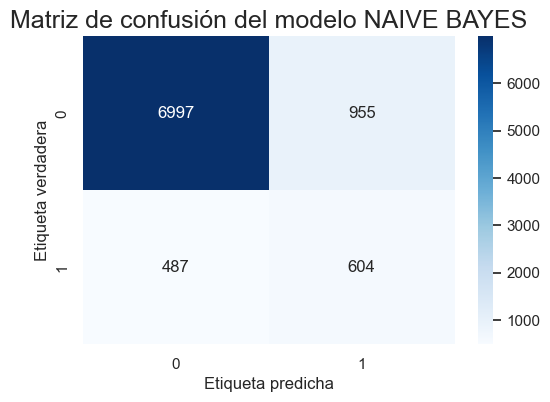

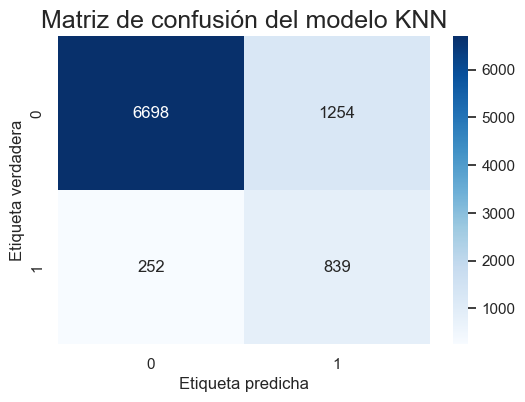

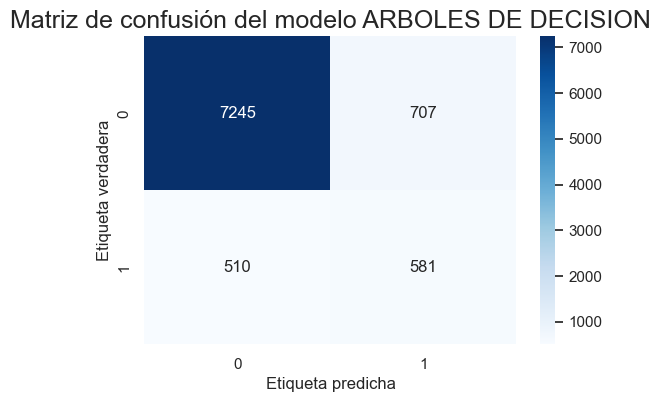

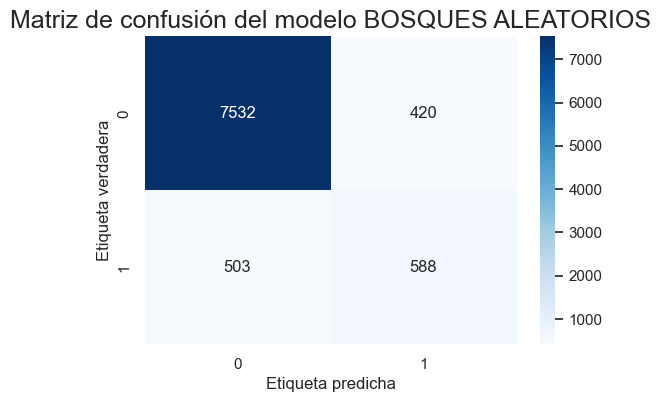

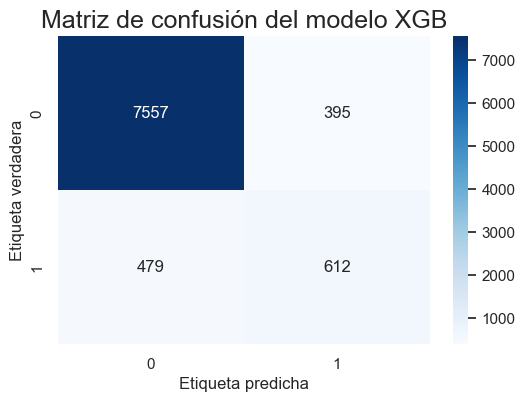

In [ ]:
graficar_matriz_confusion(modelos_entrenados, X_test, y_test)

In [ ]:
reporte_modelos(modelos_entrenados, X_train, y_train)

REGRESION LOGISTICA


              precision    recall  f1-score   support

           0       0.88      0.93      0.90     33952
           1       0.71      0.58      0.64     10185

    accuracy                           0.85     44137
   macro avg       0.79      0.76      0.77     44137
weighted avg       0.84      0.85      0.84     44137

NAIVE BAYES
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     33952
           1       0.71      0.33      0.45     10185

    accuracy                           0.81     44137
   macro avg       0.77      0.64      0.67     44137
weighted avg       0.80      0.81      0.79     44137

KNN
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     33952
           1       0.80      0.66      0.72     10185

    accuracy                           0.88     44137
   macro avg       0.85      0.81      0.83     44137
weighted avg       0.88      0.88      0.88     44137

ARB

{'REGRESION LOGISTICA': [0.7064198409873027,
  0.848063982599633,
  0.5844869906725577],
 'NAIVE BAYES': [0.7103594080338267, 0.8143281147336702, 0.32989690721649484],
 'KNN': [0.8004518967772625, 0.8837256723384009, 0.6608738340697103],
 'ARBOLES DE DECISION': [0.8620483130365343,
  0.9335931304800961,
  0.8479135984290623],
 'BOSQUES ALEATORIOS': [0.8508271258585663,
  0.9335704737521807,
  0.863524791359843],
 'XGB': [0.769605719237435, 0.8820264177447493, 0.697594501718213]}

In [ ]:
resultados_modelos = reporte_modelos(modelos_entrenados, X_test, y_test)

REGRESION LOGISTICA
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      5970
           1       0.51      0.60      0.55       812

    accuracy                           0.88      6782
   macro avg       0.73      0.76      0.74      6782
weighted avg       0.89      0.88      0.89      6782

NAIVE BAYES
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      5970
           1       0.53      0.34      0.42       812

    accuracy                           0.88      6782
   macro avg       0.72      0.65      0.68      6782
weighted avg       0.87      0.88      0.87      6782

KNN


              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5970
           1       0.47      0.50      0.48       812

    accuracy                           0.87      6782
   macro avg       0.70      0.71      0.71      6782
weighted avg       0.88      0.87      0.87      6782

ARBOLES DE DECISION
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      5970
           1       0.49      0.57      0.53       812

    accuracy                           0.88      6782
   macro avg       0.72      0.74      0.73      6782
weighted avg       0.89      0.88      0.88      6782

BOSQUES ALEATORIOS
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      5970
           1       0.49      0.60      0.54       812

    accuracy                           0.88      6782
   macro avg       0.72      0.76      0.74      6782
weighted avg       0.89      0.88  

In [ ]:
resultados_modelos = reporte_modelos(modelos_entrenados, X_test, y_test)

REGRESION LOGISTICA
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      5970
           1       0.39      0.82      0.53       812

    accuracy                           0.83      6782
   macro avg       0.68      0.83      0.71      6782
weighted avg       0.90      0.83      0.85      6782

NAIVE BAYES
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      5970
           1       0.44      0.42      0.43       812

    accuracy                           0.87      6782
   macro avg       0.68      0.67      0.68      6782
weighted avg       0.86      0.87      0.87      6782

KNN


              precision    recall  f1-score   support

           0       0.96      0.83      0.89      5970
           1       0.37      0.72      0.48       812

    accuracy                           0.82      6782
   macro avg       0.66      0.77      0.69      6782
weighted avg       0.89      0.82      0.84      6782

ARBOLES DE DECISION
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      5970
           1       0.37      0.55      0.44       812

    accuracy                           0.83      6782
   macro avg       0.65      0.71      0.67      6782
weighted avg       0.87      0.83      0.85      6782

BOSQUES ALEATORIOS
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      5970
           1       0.45      0.58      0.51       812

    accuracy                           0.86      6782
   macro avg       0.70      0.74      0.72      6782
weighted avg       0.88      0.86  

In [ ]:
# Convertir el diccionario en un dataframe de pandas
df_results = pd.DataFrame.from_dict(resultados_modelos, 
                                    orient='index', 
                                    columns=['precision', 'accuracy', 'recall'])
# Agregar una nueva columna llamada modelos con las claves del diccionario
df_results['modelos'] = df_results.index
df_results.reset_index(inplace=True)
# Reordenar las columnas del dataframe
df_results = df_results[['modelos', 'precision', 'accuracy', 'recall']]
# Mostrar el dataframe resultante
df_results.sort_values(by='accuracy',ascending=False)

,modelos,precision,accuracy,recall
5,XGB,0.529473,0.888676,0.630542
1,NAIVE BAYES,0.530303,0.884990,0.344828
0,REGRESION LOGISTICA,0.510011,0.883073,0.596059
4,BOSQUES ALEATORIOS,0.493454,0.878354,0.603448
3,ARBOLES DE DECISION,0.490426,0.877617,0.567734
2,KNN,0.471963,0.873194,0.497537


## FEATURE EXTRACCION

In [ ]:
# # Obtener los valores de importancia de cada feature
# rf = modelos_entrenados['BOSQUES ALEATORIOS']
# importances = rf.feature_importances_

# # Crear un dataframe con los nombres y las importancias de los features
# feature_importances_df = pd.DataFrame({
#     "feature": list(df3.columns.drop('target')),
#     "importance": importances
# })

# # Ordenar el dataframe de mayor a menor importancia
# feature_importances_df = feature_importances_df.sort_values("importance", ascending=False)

# # Mostrar el dataframe
# feature_importances_df

In [ ]:
# importances.shape

(40,)

In [ ]:
# len(list(df3.columns))

41

## **<font color='Purple'>Predicción</font>**

## **<font color='#7d2181'>Implementación</font>**

## **<font color='#7d2181'>Despliegue</font>**